In [160]:
import keras
import os
import tensorboard as tf
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers.core import Dense
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from keras.models import model_from_json
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import img_to_array
from keras.layers import Dropout
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import pandas as pd
import PIL
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator
import scipy.io as sio
#from imutils import paths
from keras.utils import to_categorical
import scipy.misc as mi
import matplotlib.pyplot as plt

In [161]:
# import the necessary packages
import os

def list_images(basePath, contains=None):
    # return the set of files that are valid
    return list_files(basePath, validExts=(".jpg", ".jpeg", ".png", ".bmp", ".tif", ".tiff"), contains=contains)

def list_files(basePath, validExts=(".jpg", ".jpeg", ".png", ".bmp", ".tif", ".tiff"), contains=None):
    # loop over the directory structure
    for (rootDir, dirNames, filenames) in os.walk(basePath):
        # loop over the filenames in the current directory
        for filename in filenames:
            # if the contains string is not none and the filename does not contain
            # the supplied string, then ignore the file
            if contains is not None and filename.find(contains) == -1:
                continue

            # determine the file extension of the current file
            ext = filename[filename.rfind("."):].lower()

            # check to see if the file is an image and should be processed
            if ext.endswith(validExts):
                # construct the path to the image and yield it
                imagePath = os.path.join(rootDir, filename).replace(" ", "\\ ")
                yield imagePath

In [162]:
def createModel():
    model = Sequential()
    
    #Convolutional layers with 32 filters / kernels with a window size of 3×3
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(128,128,3)))
    model.add(Conv2D(32, (3, 3), activation='relu'))
     #Max pooling layer with window size 2×2
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    #Conv layer with 64 filters
        
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    #Dense layer which performs the classification among 10 classes using a softmax layer
    
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))
     
    return model

In [163]:
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D, AveragePooling2D
from keras.optimizers import SGD, Adagrad

def create_model_one():
    model = Sequential()
    model.add(ZeroPadding2D((1, 1), input_shape=(3, 128, 128), dim_ordering='th'))
    model.add(Convolution2D(8, 3, 3, activation='relu', dim_ordering='th', init='he_uniform'))
    model.add(Dropout(0.2))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), dim_ordering='th'))
    model.add(ZeroPadding2D((1, 1), dim_ordering='th'))
    model.add(Convolution2D(16, 3, 3, activation='relu', dim_ordering='th', init='he_uniform'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), dim_ordering='th'))
    model.add(Dropout(0.2))
    
    model.add(Flatten())
    model.add(Dense(96, activation='relu',init='he_uniform'))
    model.add(Dropout(0.4))
    model.add(Dense(24, activation='relu',init='he_uniform'))
    model.add(Dropout(0.2))
    model.add(Dense(2, activation='softmax'))

    sgd = SGD(lr=1e-2, decay=1e-4, momentum=0.89, nesterov=False)
    model.compile(optimizer=sgd, loss='categorical_crossentropy' , metrics=['accuracy'])

    return model

In [164]:
def createModel2():
    model = Sequential()
    # First conv layer:
    # Filters: 32
    # Kernel: 3x3 (9px)
    model.add(Conv2D(32, (3, 3), input_shape=input_shape))
    model.add(Activation('relu'))
    # Max pool
    # Size: 2x2 (combine 4px to 1)
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Second conv layer
    # Filters: 32
    # Kernel: 3x3 (9px)
    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    # Max pool
    # Size: 2x2 (combine 4px to 1)
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Third conv layer
    # Filters: 64
    # Kernel: 3x3 (9px)
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    # Max pool
    # Size: 2x2 (combine 4px to 1)
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten turns 3D map into vector
    model.add(Flatten())
    # Dense layer
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    # Output layer
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    
    return model

In [166]:
model_2 = createModel()

In [103]:
np.reshape(image , (3,64,64))

array([[[255., 255., 255., ..., 255., 255., 255.],
        [255., 255., 255., ..., 255., 255., 255.],
        [255., 255., 255., ..., 255., 255., 255.],
        ...,
        [255., 255., 255., ..., 255., 255., 255.],
        [255., 255., 255., ..., 254., 252., 253.],
        [172., 171., 173., ..., 254., 254., 254.]],

       [[254., 254., 252., ..., 255., 255., 255.],
        [255., 255., 255., ..., 242., 239., 238.],
        [187., 186., 190., ..., 245., 245., 255.],
        ...,
        [ 81., 192., 197., ..., 255., 255., 255.],
        [255., 255., 255., ..., 255., 255., 255.],
        [255., 255., 255., ...,  51., 109.,  92.]],

       [[ 76., 251., 255., ..., 255., 255., 255.],
        [255., 255., 255., ..., 255., 255., 255.],
        [255., 255., 255., ...,  50., 123., 106.],
        ...,
        [255., 255., 255., ..., 255., 255., 255.],
        [255., 255., 255., ..., 255., 255., 255.],
        [255., 255., 255., ..., 255., 255., 255.]]], dtype=float32)

In [167]:
import random
import cv2

In [168]:
seed = 9
np.random.seed(seed)

In [169]:
import pickle
def savepickle(obj , filename):
    f = open(filename+'.pckl', 'wb')
    pickle.dump(obj, f)
    f.close()
def loadpickle(filename):
    f = open(filename+'.pckl', 'rb')
    obj = pickle.load(f)
    f.close()
    return obj

In [195]:
imageFolderPath = '/home/neuronelab/Desktop/DatasetFinal/'
# initialize the data and labels
print("[INFO] loading images...")
data = []
labels = []

# grab the image paths and randomly shuffle them
imagePaths = sorted(list(list_images(imageFolderPath)))
random.seed(42)
random.shuffle(imagePaths)
# loop over the input images
for imagePath in imagePaths:
    if imagePath is not None:
        try:
            # load the image, pre-process it, and store it in the data list
            image = cv2.imread(imagePath)
            zimage = cv2.resize(image, (128, 128))
            image = img_to_array(zimage)
            #image = np.reshape(image , (3,128,128))
            data.append(image)
            # extract the class label from the image path and update the
            # labels list
            label = imagePath.split(os.path.sep)[-2]
            label = 1 if label == "Ray-Ban" else 0
            labels.append(label)
        except:
            print("error loading ", imagePath)
# scale the raw pixel intensities to the range [0, 1]
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

[INFO] loading images...
error loading  /home/neuronelab/Desktop/DatasetFinal/Other/Arman92.jpg


In [196]:
print(labels)

[0 0 0 ... 0 0 1]


In [197]:
(trainX, testX, trainY, testY) = train_test_split(data,labels, test_size=0.25, random_state=42)

# convert the labels from integers to vectors
trainY = to_categorical(trainY, num_classes=2)
testY = to_categorical(testY, num_classes=2)
print(trainX.shape)

(5074, 128, 128, 3)


In [198]:
testY

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [121]:
prova = create()

/home/neuronelab/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `ZeroPadding2D` call to the Keras 2 API: `ZeroPadding2D((1, 1), input_shape=(3, 128, 1..., data_format="channels_first")`
  
/home/neuronelab/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu", data_format="channels_first", kernel_initializer="he_uniform")`
  import sys
/home/neuronelab/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), strides=(2, 2), data_format="channels_first")`
  if __name__ == '__main__':
/home/neuronelab/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `ZeroPadding2D` call to the Keras 2 API: `ZeroPadding2D((1, 1), data_format="channels_first")`
  # Remove the CWD from sys.path while we load stuff.
/home/ne

In [123]:
prova.fit(trainX, trainY, validation_data=(testX, testY),shuffle=True, epochs=50, batch_size=25, verbose=1)

Train on 4137 samples, validate on 1379 samples
Epoch 1/50
4137/4137 [==============================] - 43s 10ms/step - loss: 1.3519 - acc: 0.9161 - val_loss: 1.6831 - val_acc: 0.8956
Epoch 2/50
4137/4137 [==============================] - 42s 10ms/step - loss: 1.3519 - acc: 0.9161 - val_loss: 1.6831 - val_acc: 0.8956
Epoch 3/50
4137/4137 [==============================] - 42s 10ms/step - loss: 1.3519 - acc: 0.9161 - val_loss: 1.6831 - val_acc: 0.8956
Epoch 4/50
4137/4137 [==============================] - 42s 10ms/step - loss: 1.3558 - acc: 0.9159 - val_loss: 1.6831 - val_acc: 0.8956
Epoch 5/50
4137/4137 [==============================] - 42s 10ms/step - loss: 1.3519 - acc: 0.9161 - val_loss: 1.6831 - val_acc: 0.8956
Epoch 6/50
4137/4137 [==============================] - 42s 10ms/step - loss: 1.3519 - acc: 0.9161 - val_loss: 1.6831 - val_acc: 0.8956
Epoch 7/50
4137/4137 [==============================] - 42s 10ms/step - loss: 1.3519 - acc: 0.9161 - val_loss: 1.6831 - val_acc: 0.8956


In [202]:
from pyimagesearch.lenet import LeNet
from keras.optimizers import Adam


EPOCHS = 150
INIT_LR = 1e-3
BS = 25
# construct the image generator for data augmentation
aug = ImageDataGenerator(rotation_range=30, width_shift_range=0.1,height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,horizontal_flip=True, fill_mode="nearest")

# initialize the model
print("[INFO] compiling model...")
model = LeNet.build(width=128, height=128, depth=3, classes=2)
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])

# train the network
print("[INFO] training network...")
H = model.fit_generator(aug.flow(trainX, trainY, batch_size=BS),validation_data=(testX, testY), steps_per_epoch=len(trainX) // BS,epochs=EPOCHS, verbose=1)



[INFO] compiling model...
[INFO] training network...
Epoch 1/150
202/202 [==============================] - 101s 499ms/step - loss: 4.2571 - acc: 0.7317 - val_loss: 4.3960 - val_acc: 0.7258
Epoch 2/150
202/202 [==============================] - 96s 478ms/step - loss: 4.2926 - acc: 0.7322 - val_loss: 4.3960 - val_acc: 0.7258
Epoch 3/150
202/202 [==============================] - 97s 479ms/step - loss: 4.2730 - acc: 0.7334 - val_loss: 4.3960 - val_acc: 0.7258
Epoch 4/150
202/202 [==============================] - 97s 480ms/step - loss: 4.2925 - acc: 0.7322 - val_loss: 4.3960 - val_acc: 0.7258
Epoch 5/150
202/202 [==============================] - 97s 479ms/step - loss: 4.3118 - acc: 0.7310 - val_loss: 4.3960 - val_acc: 0.7258
Epoch 6/150
202/202 [==============================] - 97s 480ms/step - loss: 4.2349 - acc: 0.7358 - val_loss: 4.3960 - val_acc: 0.7258
Epoch 7/150
202/202 [==============================] - 97s 479ms/step - loss: 4.2923 - acc: 0.7322 - val_loss: 4.3960 - val_acc: 0

202/202 [==============================] - 97s 478ms/step - loss: 4.2069 - acc: 0.7376 - val_loss: 4.3960 - val_acc: 0.7258
Epoch 61/150
202/202 [==============================] - 97s 478ms/step - loss: 4.2259 - acc: 0.7364 - val_loss: 4.3960 - val_acc: 0.7258
Epoch 62/150
202/202 [==============================] - 97s 479ms/step - loss: 4.3590 - acc: 0.7281 - val_loss: 4.3960 - val_acc: 0.7258
Epoch 63/150
202/202 [==============================] - 97s 478ms/step - loss: 4.2573 - acc: 0.7344 - val_loss: 4.3960 - val_acc: 0.7258
Epoch 64/150
202/202 [==============================] - 97s 478ms/step - loss: 4.2578 - acc: 0.7344 - val_loss: 4.3960 - val_acc: 0.7258
Epoch 65/150
202/202 [==============================] - 97s 478ms/step - loss: 4.3746 - acc: 0.7271 - val_loss: 4.3960 - val_acc: 0.7258
Epoch 66/150
202/202 [==============================] - 96s 478ms/step - loss: 4.1591 - acc: 0.7405 - val_loss: 4.3960 - val_acc: 0.7258
Epoch 67/150
202/202 [==============================] 

Epoch 120/150
202/202 [==============================] - 97s 479ms/step - loss: 4.2134 - acc: 0.7372 - val_loss: 4.3960 - val_acc: 0.7258
Epoch 121/150
202/202 [==============================] - 97s 478ms/step - loss: 4.3304 - acc: 0.7299 - val_loss: 4.3960 - val_acc: 0.7258
Epoch 122/150
202/202 [==============================] - 97s 479ms/step - loss: 4.2575 - acc: 0.7344 - val_loss: 4.3960 - val_acc: 0.7258
Epoch 123/150
202/202 [==============================] - 97s 479ms/step - loss: 4.2381 - acc: 0.7356 - val_loss: 4.3960 - val_acc: 0.7258
Epoch 124/150
202/202 [==============================] - 97s 478ms/step - loss: 4.4350 - acc: 0.7233 - val_loss: 4.3960 - val_acc: 0.7258
Epoch 125/150
202/202 [==============================] - 97s 479ms/step - loss: 4.1048 - acc: 0.7439 - val_loss: 4.3960 - val_acc: 0.7258
Epoch 126/150
202/202 [==============================] - 97s 478ms/step - loss: 4.2991 - acc: 0.7318 - val_loss: 4.3960 - val_acc: 0.7258
Epoch 127/150
202/202 [===========

In [146]:
# save the model to disk
print("[INFO] serializing network...")
prova.save('ourNewModel128_128.model')


[INFO] serializing network...


In [203]:
hist = prova.history

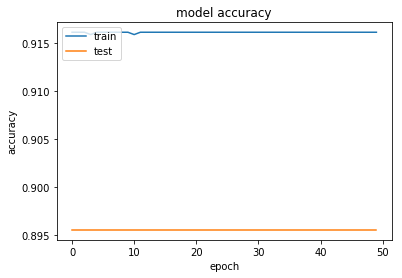

In [204]:
# summarize history for accuracy
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

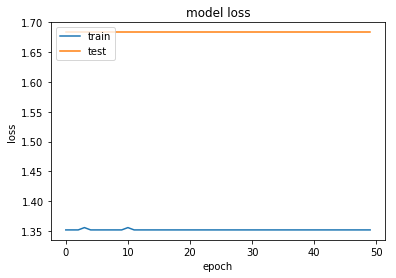

In [205]:
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [136]:
# pre-process the image for classification
image = cv2.imread('/home/neuronelab/Desktop/FraudDetection_v2/NN/test_images/r2.jpg')### CHANGE PATH
zimage = cv2.resize(image, (128, 128))
image = zimage.astype("float") / 255.0
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
#IMAGE LEGEND R = RAYBAN  , S=SUNGLASSES , W = PEOPLE WITH SUNGLASSES , N = NO SUNGLASSES

In [138]:
(notSunglasses, sunglasses) = prova.predict(np.reshape(zimage , (3,128,128))
)[0]
# build the label
label = "Ray-Ban" if sunglasses > notSunglasses else "Persol"
proba = sunglasses if sunglasses > notSunglasses else notSunglasses
label = "{}: {:.2f}%".format(label, proba * 100)
print(label)

ValueError: Error when checking input: expected zero_padding2d_17_input to have 4 dimensions, but got array with shape (3, 128, 128)

In [ ]:
our=createModel()
our.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
our.fit(trainX, trainY, validation_data=(testX, testY),shuffle=True, epochs=50, batch_size=25, verbose=1)

Train on 5074 samples, validate on 1692 samples
Epoch 1/50
5074/5074 [==============================] - 171s 34ms/step - loss: 0.5783 - acc: 0.7333 - val_loss: 0.4961 - val_acc: 0.7908
Epoch 2/50
5074/5074 [==============================] - 168s 33ms/step - loss: 0.4474 - acc: 0.8114 - val_loss: 0.3868 - val_acc: 0.8493
Epoch 3/50
5074/5074 [==============================] - 168s 33ms/step - loss: 0.3702 - acc: 0.8601 - val_loss: 0.3327 - val_acc: 0.8794
Epoch 4/50
5074/5074 [==============================] - 169s 33ms/step - loss: 0.3208 - acc: 0.8788 - val_loss: 0.3153 - val_acc: 0.8824
Epoch 5/50
5074/5074 [==============================] - 171s 34ms/step - loss: 0.2793 - acc: 0.9020 - val_loss: 0.2983 - val_acc: 0.9007
Epoch 6/50
5074/5074 [==============================] - 168s 33ms/step - loss: 0.2359 - acc: 0.9155 - val_loss: 0.2936 - val_acc: 0.9090
Epoch 7/50
5074/5074 [==============================] - 168s 33ms/step - loss: 0.2029 - acc: 0.9314 - val_loss: 0.2905 - val_acc: 

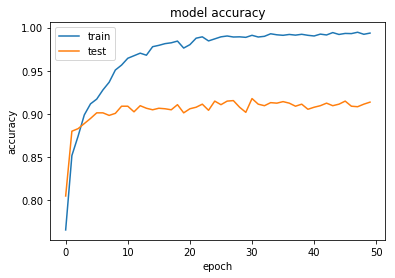

In [191]:
# summarize history for accuracy
hist = our.history
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

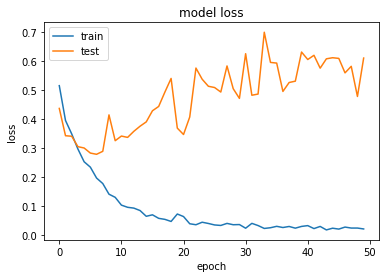

In [192]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [178]:
our.save('model128128_2910.model')

In [154]:
labels

array([1, 1, 1, ..., 0, 0, 0])

In [189]:
# pre-process the image for classification
image = cv2.imread('/home/neuronelab/Desktop/FraudDetection_v2/NN/test_images/s6.jpg')### CHANGE PATH
zimage = cv2.resize(image, (128, 128))
image = zimage.astype("float") / 255.0
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
#IMAGE LEGEND R = RAYBAN  , S=SUNGLASSES , W = PEOPLE WITH SUNGLASSES , N = NO SUNGLASSES
(notSunglasses, sunglasses) = our.predict(image)[0]
# build the label
label = "RayBan" if sunglasses > notSunglasses else "Not Rayban"
proba = sunglasses if sunglasses > notSunglasses else notSunglasses
label = "{}: {:.2f}%".format(label, proba * 100)
print(label)

Not Rayban: 99.99%


In [ ]:
#https://flyyufelix.github.io/2016/10/03/fine-tuning-in-keras-part1.html